# Quantum Mechanics Practical Exam - 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Question Paper

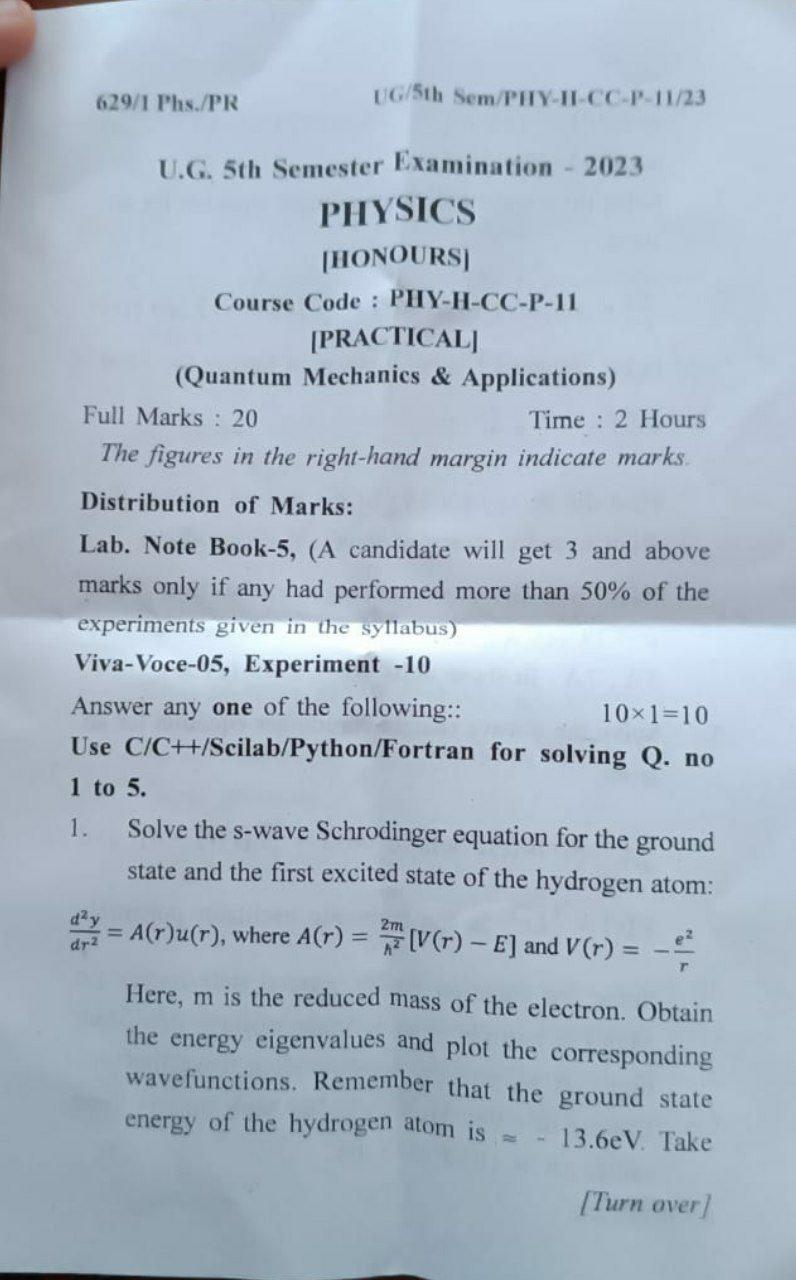

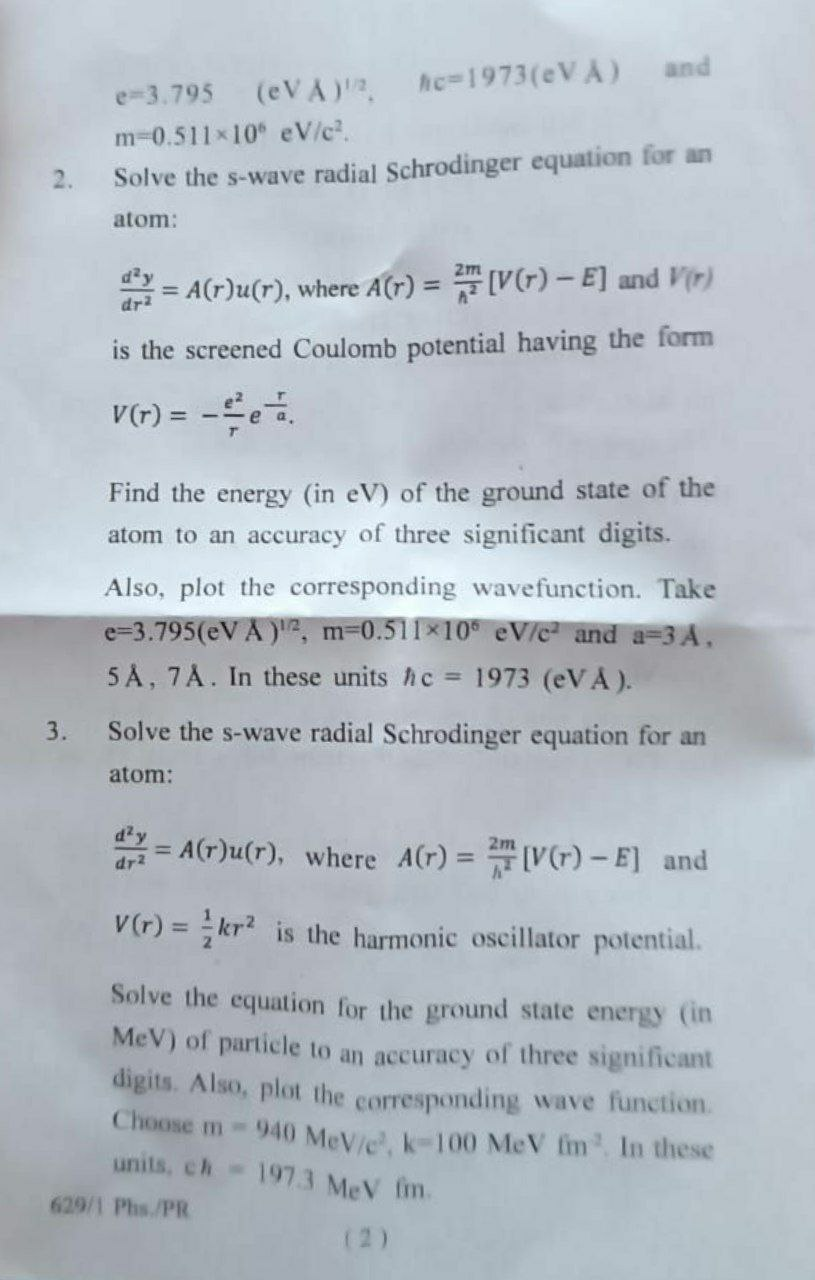

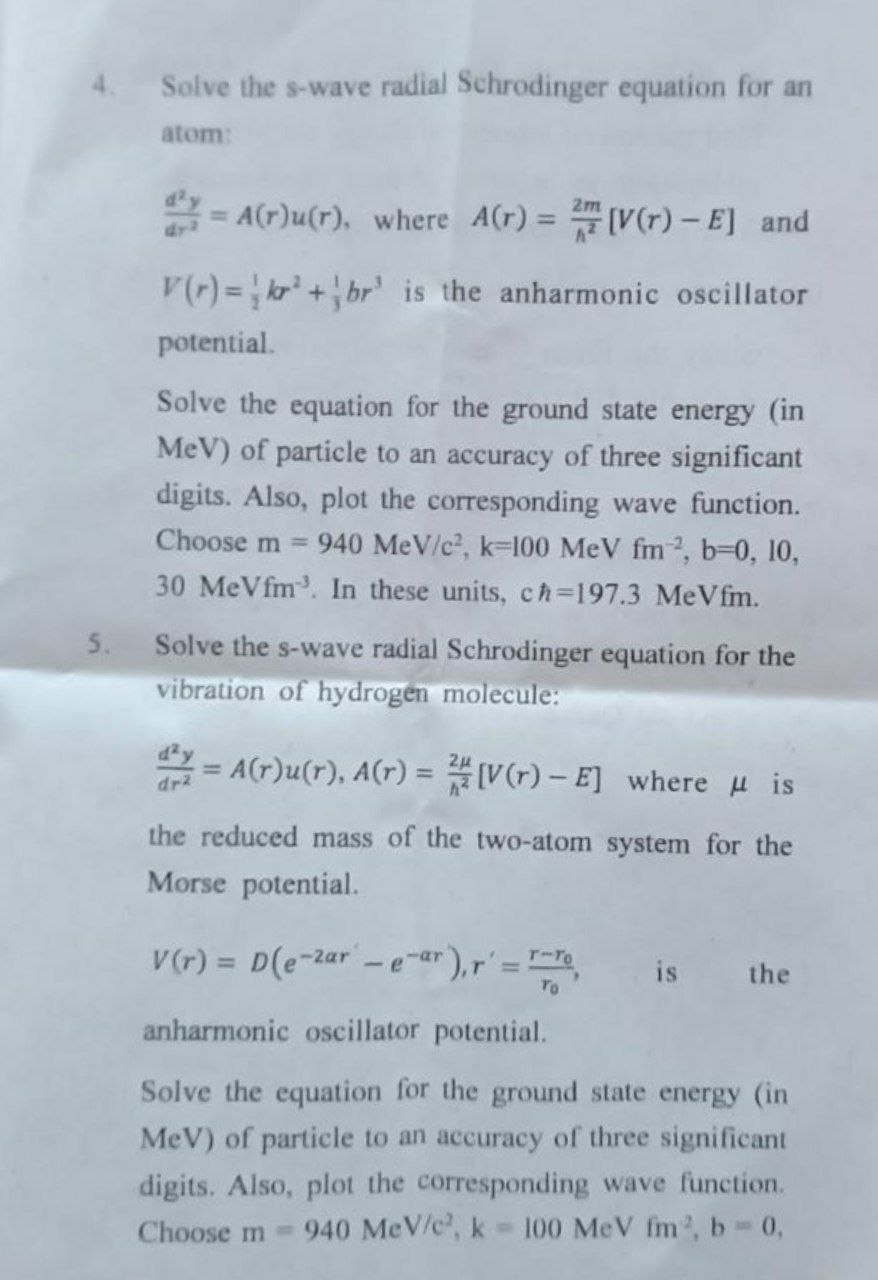

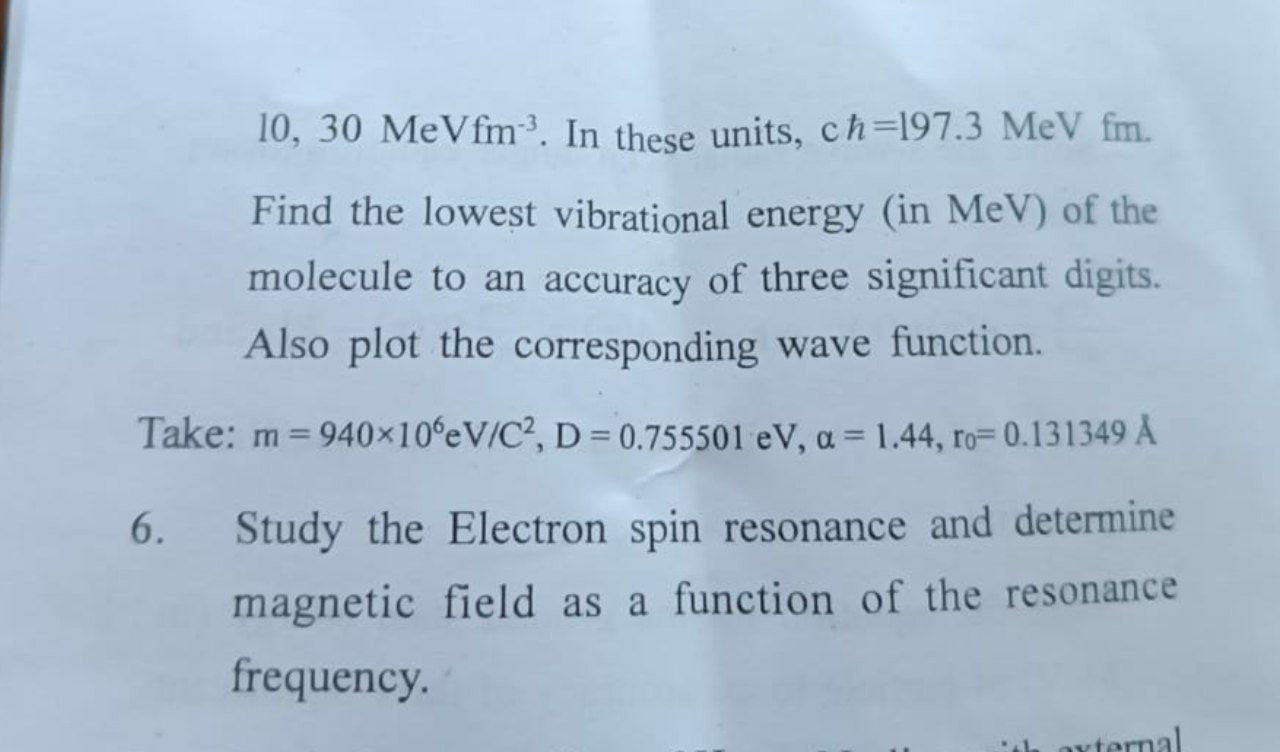

In [2]:
for i in range(1,5):
    display(Image(filename=f'sem_questions_2023/page{i}.jpg'))

## Numerical solution by Central Difference method

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

**Algorithm:**

1. Define $p(x),q(\lambda,x),r(x)$.
2. x array and y array
3. h = dx = x[1] - x[0]
4. N = len(x)
5. Write $a,b,c,d$ and $y_i$ for i in range(N).

$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

In [4]:
def prop_central_diff(pr, p, q, r, x, y, dx):
    '''
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2 + dx**2 *q(pr, x[i-1])
        b = -(1 + dx/2 *p(x[i-1]))
        c = dx**2 *r(x[i-1])
        d = 1 - dx/2 *p(x[i-1])
        yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
    return yy

### Normalization

In [5]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

### Determination of eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr)`**

In [6]:
def center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr):
    '''
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    '''
    N = int((xN -x0)/dx)
    dx = (xN -x0)/N
    x = [x0 +i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    while abs(pr_max - pr_min) >  tol and itr < max_itr:
        pr = 0.5 *(pr_min + pr_max)  # bisection method
        yy = prop_central_diff(pr, p, q, r, x, y, dx)
        cnt = 0  # count
        for i in range(1, N-2):
            if yy[i]*yy[i+1] < 0:
                cnt += 1
        if cnt > nodes:
            pr_max = pr
        elif cnt < nodes:
            pr_min = pr
        else:
            if yy[N-1] > yN:
                pr_min = pr
            elif yy[N-1] < yN:
                pr_max = pr
            itr += 1
    if itr < max_itr:
        return pr, x, yy
    else:
        return None, None, None

## Question 1
$$ V(r) = -\frac{e^2}{r} $$

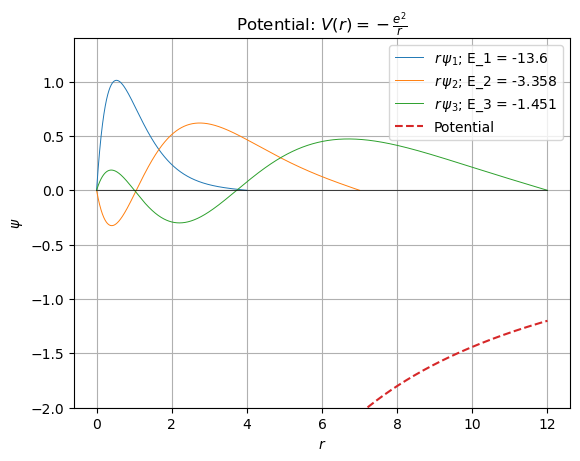

In [7]:
E0 = 13.6  # eV
e = 3.795  # rt(eV A)
hc = 1973   # eV A
m = 0.511e6  # eV/c2
Ac = 2*m/hc**2
def V(r):
    return -e**2/r
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-4, 0, [4,7,12], 0

for nodesn in range(3):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-5
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-2,1.4)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r}$')
plt.grid()
plt.show()

## Question 2
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

C:\Users\suman\AppData\Local\Temp\ipykernel_19704\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:


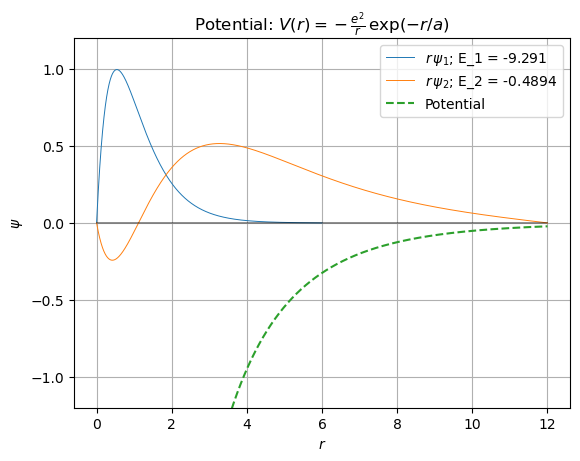

In [8]:
E0 = 13.6  # eV - is to be obtained by numerical methods
e = 3.795  # rt(eV A)
hc = 1973   # eV A
m = 0.511e6  # eV/c2
Ac = 2*m/hc**2
a = 3

def V(r):
    return  -e**2/r * np.exp(-r/a)
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-3, 0, [6,12], 0

for nodesn in range(2):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-1.2,1.2)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)$')
plt.grid()
plt.show()

## Question 3
$$ V(r) = \frac{1}{2} kr^2 $$

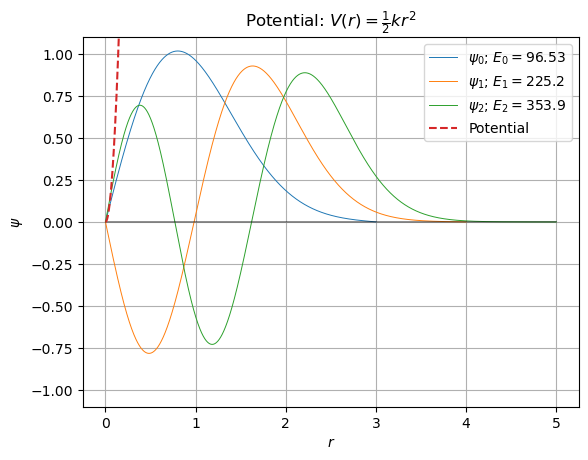

In [9]:
hc = 197.3   # MeV fm
m = 940  # MeV/c2
k = 100  # MeV fm-2
Ac = 2*m/hc**2

def V(r):
    return (1/2)*k*r**2
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 0, 0, [3,4,5], 0

for nodesn in range(3):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn}$; $E_{nodesn} = {E:.4}$',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = \\frac{1}{2}kr^2$')
plt.grid()
plt.show()

## Question 4
$$ V(r) = \frac{1}{2}kr^2 +\frac{1}{3} br^3 $$

In [10]:
hc = 197.3   # MeV fm
m = 940  # MeV/c2
k = 100  # MeV fm-2
b = [0,10,30] # MeV fm-3
Ac = 2*m/hc**2

def anharmonic_osc(b):
    def V(r):
        return (1/2)*k*r**2 + (1/3)*b*r**3
    def A(E, r):
        return Ac*(V(r)-E)

    def p(r):
        return 0
    def q(E, r):
        return A(E, r)
    def rfn(r):
        return 0

    dr = 1e-3
    tol = 1e-6
    mxitr = 100
    r0, psi0, rN, psiN = 0, 0, [3,4], 0

    for nodesn in range(2):
        Emn, Emx = V(r0), V(rN[nodesn])
        psi1 = psi0 + (-1)**nodesn *1e-4
        E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                        r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
        if E != None:
            psi = psiNorm(psi, dr)
            r = np.array(r)
            plt.plot(r, psi, label=f'$\psi_{nodesn}$; $E_{nodesn} = {E:.4}$',lw=0.7)
    plt.xlabel('$r$')
    plt.ylabel('$\psi$')
    plt.ylim(-1.2,1.4)
    xax = [0 for i in r]
    plt.plot(r,xax,'k', lw=0.5)
    plt.plot(r, V(r), '--', label='Potential')
    plt.legend(loc='best')
    plt.title('Potential: $ V(r) = \\frac{1}{2}kr^2 +\\frac{1}{3} br^3 $'
              +f'\nb={b}')
    plt.grid()
    plt.show()

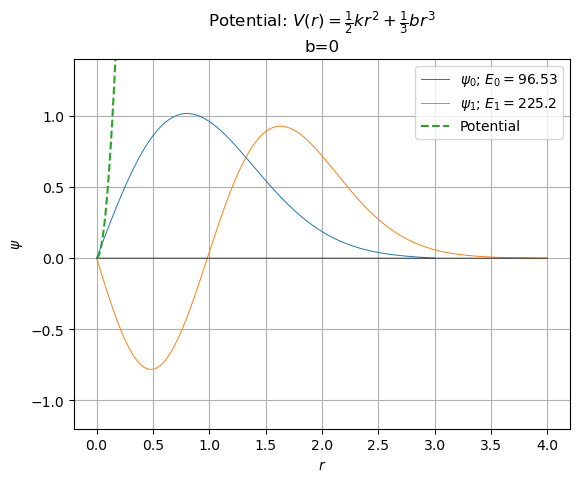

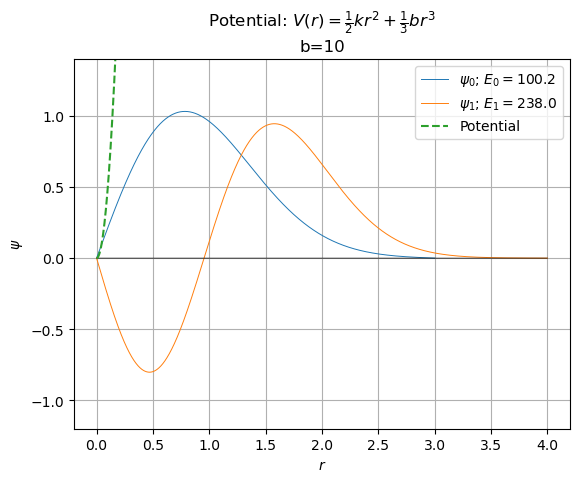

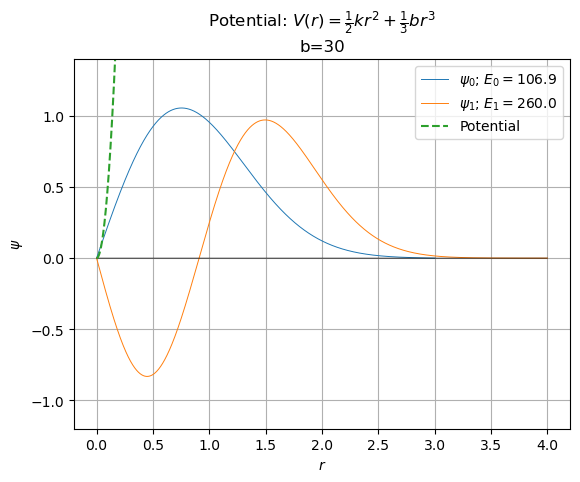

In [11]:
for i in range(3):
    anharmonic_osc(b[i])

## Question 5
$$ V(r) = D(e^{-2\alpha r} - e^{-\alpha r}) $$
No data is given for this question.

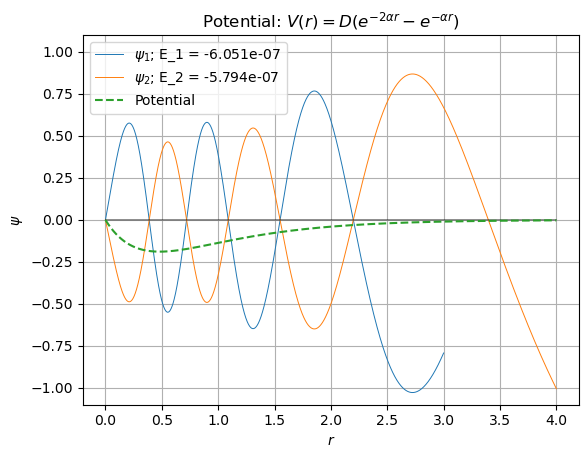

In [12]:
hc = 1973   # eV A
m = 940e6  # eV/c2
D = 0.755501  # eV
al = 1.44
r_0 = 0.131349  # A
Ac = 2*m/hc**2

def V(r):
    return D*(np.exp(-2*al*r)-np.exp(-al*r))
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 0, 0, [3,4], 0

for nodesn in range(2):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $ V(r) = D(e^{-2\\alpha r} - e^{-\\alpha r}) $')
plt.grid()
plt.show()